<div style="text-align:center">
    <font color='purple'><h1>1. Objective of the project </h1></font>
</div>

   In this project we aim to study the the performance of ENSIA students by highlighting the main problems that affect them and influence their studies and productivity, in order to find solutions that  helps the school, teachers, and students to enhance the educational level of the school and make our students more performant and productive 

<div style="text-align:center">
    <font color='purple'><h1>2. Data Understanding  </h1></font>
</div>

<div style="text-align:left ">
    <font color='blue'><h3>2.1. Collection of initial data </h3></font>
</div>

   initial data was collected using a form sent to all the ENSIA student in addition to some additional information from  the administration of the school considering the students' level in different modules and their averages of the previous years 


<div style="text-align:left ">
    <font color='blue'><h3>2.2.  Data description  </h3></font>
</div>

data collected from the students contains mainly some personal information including (gender, year of study, Baccalaureate specialty), some studying habits, problems faced,motivation, and rating themselves in different fields ( english, mathematics, computer science and programming ).
  additionaly, the data contains the level of student in some modules (Intensive english, Seminar, CPSCT, Analysis I, Algebra, Academic Communication I, Intro to Programming with C++, Analysis II, Academic Communication II, OOP, Linear Algebra, Proba Stat, Analysis III, DSA, Archi 1, Logic, Complexity, Proba Stat II, Linear Algebra II, DataBases, Intro to  AI, Oper.res, Archi II, Oper. Syst, Soft. Eng, Web Prog, Intro to Business) in a scale of low, moderate or high. And also their averages in all the previous semesters.

<div style="text-align:center">
    <font color='purple'><h1>3. Data prepration
       </h1></font>
</div>

<div style="text-align:left ">
    <font color='blue'><h3>3.1. Data selection  </h3></font>
</div>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import pairwise_distances
import numpy as np

In [2]:
df = pd.read_csv("data/Final_students_data_scores.csv")
df[49:52]

,Gender,In which year of your studies are you currently enrolled:,BAC specialty,How many hours per week do you spend studying (personnal efforts):,Where do you prefer to study:,You prefer to study alone:,What learning methods do help you understand better:,What types of resources do you use most:,Do you use a planer or a schedule,Problems,...,2Y_Average S1,2Y_Intro AI,2Y_Oper. res,2Y_Archi II,2Y_Oper. Syst,2Y_Soft. Eng.,2Y_Web Prog.,2Y_Intro. Busin.,2Y_Average S2,2Y_Average
49,Male,First year,Mathematics,More than 41 hours,In the school's library,With a group,"Lectures, Learning by practicing","Online tutorials, YouTube videos",Yes,Teaching language,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50,Female,First year,Mathematics,10-17,At home,Alone,"Lectures, Learning by practicing, Online cours...","Books, Online documents, YouTube videos",Yes,Lack of time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51,Female,Third year,Mathematics,34-41,At home,Alone,"Lectures, Learning by practicing, Mind mapping...","Online tutorials, Online documents, YouTube vi...",Yes,Teachers' teaching method,...,Moderate,Low,Moderate,Moderate,High,Moderate,Moderate,High,10.0,10.0


In [3]:
# Print info of DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 61 columns):
 #   Column                                                                                 Non-Null Count  Dtype  
---  ------                                                                                 --------------  -----  
 0   Gender                                                                                 275 non-null    object 
 1   In which year of your studies are you currently enrolled:                              275 non-null    object 
 2   BAC specialty                                                                          275 non-null    object 
 3   How many hours per week do you spend studying (personnal efforts):                     275 non-null    object 
 4   Where do you prefer to study:                                                          275 non-null    object 
 5   You prefer to study alone:                                                    

###  3.1.1 Delete useless columns

In [4]:
data = df.drop(['In which year of your studies are you currently enrolled:','How many hours do you sleep ',
                'Where do you prefer to study:','What learning methods do help you understand better: ',
                'What types of resources do you use most:','2. Second:','3. Third:','4. Forth:','5. Fifth:',
                '6. sixth:','7. seventh:','8. eighth','Rate your satisfaction with the schools program:',
                'Do you engage in any external activities (not related to the study field):',
                'How much do you like the field of Artificial Intelligence :','How do others feedbacks influence you:','1Y_Intensive english','1Y_Seminar',
                '1Y_CPSCT','1Y_Analysis I','1Y_Algebra','1Y_A. Com. I','1Y_Intro. Prog. C++','1Y_Analysis II',
                '1Y_A. Com. II','1Y_OOP','1Y_Linear Algebra','1Y_Proba Stat','2Y_Analysis III',
                '2Y_Average S1','2Y_DSA','2Y_Archi 1','2Y_Logic','2Y_Complexity','2Y_Proba Stat II'
                ,'2Y_Lin. Alg II','2Y_DataBases','2Y_Intro AI','2Y_Oper. res','2Y_Archi II','2Y_Oper. Syst'
                ,'2Y_Soft. Eng.','2Y_Web Prog.','2Y_Intro. Busin.'],axis=1)
data

,Gender,BAC specialty,How many hours per week do you spend studying (personnal efforts):,You prefer to study alone:,Do you use a planer or a schedule,Problems,Your level of motivation for joining ENSIA,How well do you handle stress and pressure :,In a scale of 1 to 10 how do you rate your level in the following fields:\n1. English:,2. Programming:\n,3. Computer science:,4. Mathematics,1Y_Average S1,1Y_Average S2,1Y_Average,2Y_Average S2,2Y_Average
0,Male,Mathematics,18-25,Alone,No,Pressure,4,2,7,7,9,6,NaN,NaN,NaN,NaN,NaN
1,Female,Mathematics,10-17,In peer,No,Teachers' teaching method,3,3,8,8,8,9,NaN,NaN,NaN,12.0,13.0
2,Male,Science,18-25,Alone,Yes,Private life problems,3,5,8,5,7,6,NaN,NaN,NaN,NaN,NaN
3,Male,Mathematics,18-25,Alone,No,Bad quality of internet,5,4,7,8,8,8,NaN,NaN,NaN,12.0,13.0
4,Female,Mathematics,18-25,Alone,No,Teachers' teaching method,4,2,9,7,6,9,NaN,NaN,NaN,10.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,Female,Mathematics,26-33,Alone,No,Pressure,5,3,7,8,8,8,15.0,13.0,14.0,NaN,NaN
271,Male,Mathematics,18-25,With a group,No,Lack of time,2,3,8,2,2,7,NaN,NaN,NaN,NaN,NaN
272,Male,Mathematics,18-25,Alone,No,Bad quality of internet,4,3,8,9,8,9,NaN,NaN,NaN,NaN,NaN
273,Male,Mathematics,18-25,In peer,No,Lack of time,3,3,7,5,8,5,NaN,NaN,NaN,NaN,NaN


In [5]:
data.dtypes

Gender                                                                                     object
BAC specialty                                                                              object
How many hours per week do you spend studying (personnal efforts):                         object
You prefer to study alone:                                                                 object
Do you use a planer or a schedule                                                          object
Problems                                                                                   object
Your level of motivation for joining ENSIA                                                  int64
How well do you handle stress and pressure :                                                int64
In a scale of 1 to 10 how do you rate your level in the following fields:\n1. English:      int64
2. Programming:\n                                                                           int64
3. Computer science:

<div style="text-align:left ">
    <font color='blue'><h3>3.2. Data cleaning </h3></font>
</div>

#### 3.2.1 Handling missing values

In [6]:
print('Number of missing values:')
for col in data.columns:
    print('\t%s: %d' % (col,data[col].isna().sum()))

Number of missing values:
	Gender: 0
	BAC specialty: 0
	How many hours per week do you spend studying (personnal efforts):: 0
	You prefer to study alone: : 0
	Do you use a planer or a schedule: 0
	Problems: 0
	Your level of motivation for joining ENSIA: 0
	How well do you handle stress and pressure :: 0
	In a scale of 1 to 10 how do you rate your level in the following fields:
1. English:: 0
	2. Programming:
: 0
	3. Computer science:: 0
	4. Mathematics: 0
	1Y_Average S1: 197
	1Y_Average S2: 197
	1Y_Average: 197
	2Y_Average S2: 225
	2Y_Average: 225


In [7]:
#filling missing data with the median
data['1Y_Average S1'].fillna(data['1Y_Average S1'].median(), inplace=True)
data['1Y_Average S2'].fillna(data['1Y_Average S2'].median(), inplace=True)
data['1Y_Average'].fillna(data['1Y_Average'].median(), inplace=True)
data['2Y_Average S2'].fillna(data['2Y_Average S2'].median(), inplace=True)
data['2Y_Average'].fillna(data['2Y_Average'].median(), inplace=True)
"""data['2Y_Average'].fillna(0, inplace=True)"""
data

/var/folders/lt/lzstf0g942b2sl1qy9xybfnw0000gn/T/ipykernel_8085/2933198467.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['1Y_Average S1'].fillna(data['1Y_Average S1'].median(), inplace=True)
/var/folders/lt/lzstf0g942b2sl1qy9xybfnw0000gn/T/ipykernel_8085/2933198467.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we

,Gender,BAC specialty,How many hours per week do you spend studying (personnal efforts):,You prefer to study alone:,Do you use a planer or a schedule,Problems,Your level of motivation for joining ENSIA,How well do you handle stress and pressure :,In a scale of 1 to 10 how do you rate your level in the following fields:\n1. English:,2. Programming:\n,3. Computer science:,4. Mathematics,1Y_Average S1,1Y_Average S2,1Y_Average,2Y_Average S2,2Y_Average
0,Male,Mathematics,18-25,Alone,No,Pressure,4,2,7,7,9,6,14.0,12.0,13.0,12.0,12.0
1,Female,Mathematics,10-17,In peer,No,Teachers' teaching method,3,3,8,8,8,9,14.0,12.0,13.0,12.0,13.0
2,Male,Science,18-25,Alone,Yes,Private life problems,3,5,8,5,7,6,14.0,12.0,13.0,12.0,12.0
3,Male,Mathematics,18-25,Alone,No,Bad quality of internet,5,4,7,8,8,8,14.0,12.0,13.0,12.0,13.0
4,Female,Mathematics,18-25,Alone,No,Teachers' teaching method,4,2,9,7,6,9,14.0,12.0,13.0,10.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,Female,Mathematics,26-33,Alone,No,Pressure,5,3,7,8,8,8,15.0,13.0,14.0,12.0,12.0
271,Male,Mathematics,18-25,With a group,No,Lack of time,2,3,8,2,2,7,14.0,12.0,13.0,12.0,12.0
272,Male,Mathematics,18-25,Alone,No,Bad quality of internet,4,3,8,9,8,9,14.0,12.0,13.0,12.0,12.0
273,Male,Mathematics,18-25,In peer,No,Lack of time,3,3,7,5,8,5,14.0,12.0,13.0,12.0,12.0


#### 3.2.2 handling duplicated data 

In [8]:
dups = data.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


<div style="text-align:left ">
    <font color='blue'><h3>3.3. Data formating (dealing with categorical data) </h3></font>
</div>

#### 3.3.1 split study hours/week into two columns 

In [9]:
# Split column into two
lat_long = data['How many hours per week do you spend studying (personnal efforts):'].str.split("-", expand = True)
# Assign correct columns to start and end columns in data
data['Study hours start time'] = lat_long[0]
data['Study hours end time'] = lat_long[1]
# Print the header
data[10:20]

,Gender,BAC specialty,How many hours per week do you spend studying (personnal efforts):,You prefer to study alone:,Do you use a planer or a schedule,Problems,Your level of motivation for joining ENSIA,How well do you handle stress and pressure :,In a scale of 1 to 10 how do you rate your level in the following fields:\n1. English:,2. Programming:\n,3. Computer science:,4. Mathematics,1Y_Average S1,1Y_Average S2,1Y_Average,2Y_Average S2,2Y_Average,Study hours start time,Study hours end time
10,Female,Mathematics,10-17,Alone,Yes,Lack of time,4,4,8,8,7,4,14.0,12.0,13.0,12.0,12.0,10,17
11,Male,Mathematics,10-17,Alone,No,Teachers' teaching method,2,1,5,6,5,7,12.0,11.0,11.0,12.0,12.0,10,17
12,Female,Science,18-25,In peer,No,Teachers' teaching method,3,2,7,3,4,1,14.0,12.0,13.0,12.0,12.0,18,25
13,Female,Mathematics,34-41,Alone,No,Lack of time,3,2,3,4,2,2,14.0,12.0,13.0,12.0,12.0,34,41
14,Female,Mathematics,10-17,Alone,No,Pressure,4,2,9,8,8,4,14.0,12.0,13.0,12.0,12.0,10,17
15,Male,Mathematics,34-41,In peer,No,Lack of time,5,3,8,9,7,7,14.0,12.0,13.0,12.0,12.0,34,41
16,Female,Technical maths,18-25,Alone,Yes,Pressure,2,3,4,8,5,5,14.0,12.0,13.0,12.0,12.0,18,25
17,Female,Mathematics,10-17,In peer,Yes,Private life problems,3,2,10,8,8,7,14.0,12.0,13.0,12.0,11.0,10,17
18,Female,Science,More than 41 hours,Alone,No,Teachers' teaching method,1,1,10,6,7,8,13.0,10.0,11.0,12.0,12.0,More than 41 hours,None
19,Male,Mathematics,10-17,Alone,No,Lack of previous knowledge or experience in th...,3,4,7,9,9,7,14.0,12.0,13.0,14.0,14.0,10,17


In [10]:
#Replace the NonType data with valid data
data = data.replace('More than 41 hours','42')
data['Study hours end time'].fillna('60',inplace=True)

/var/folders/lt/lzstf0g942b2sl1qy9xybfnw0000gn/T/ipykernel_8085/3888377973.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Study hours end time'].fillna('60',inplace=True)


In [11]:
#assign them to int type
data['Study hours start time'] = data['Study hours start time'].astype('int')
data['Study hours end time'] = data['Study hours end time'].astype('int')

In [12]:
# Drop first column
data.drop('How many hours per week do you spend studying (personnal efforts):', axis = 1, inplace = True)
data.dtypes

Gender                                                                                     object
BAC specialty                                                                              object
You prefer to study alone:                                                                 object
Do you use a planer or a schedule                                                          object
Problems                                                                                   object
Your level of motivation for joining ENSIA                                                  int64
How well do you handle stress and pressure :                                                int64
In a scale of 1 to 10 how do you rate your level in the following fields:\n1. English:      int64
2. Programming:\n                                                                           int64
3. Computer science:                                                                        int64
4. Mathematics      

#### 3.3.2 Replace similar values with the same value 

we will replace 'in peer' and 'with goup with 'No not alone' and 'alone' with 'yes' 

In [13]:
# Replace values 'Alone', 'In peer'and 'With a group'
mappings = {'Alone': 'Yes',
            'In peer': 'No',
            'With a group': 'No'}

# Replace values and collapse data
data['You prefer to study alone: '] = data['You prefer to study alone: '].replace(mappings)
data[10:30]

,Gender,BAC specialty,You prefer to study alone:,Do you use a planer or a schedule,Problems,Your level of motivation for joining ENSIA,How well do you handle stress and pressure :,In a scale of 1 to 10 how do you rate your level in the following fields:\n1. English:,2. Programming:\n,3. Computer science:,4. Mathematics,1Y_Average S1,1Y_Average S2,1Y_Average,2Y_Average S2,2Y_Average,Study hours start time,Study hours end time
10,Female,Mathematics,Yes,Yes,Lack of time,4,4,8,8,7,4,14.0,12.0,13.0,12.0,12.0,10,17
11,Male,Mathematics,Yes,No,Teachers' teaching method,2,1,5,6,5,7,12.0,11.0,11.0,12.0,12.0,10,17
12,Female,Science,No,No,Teachers' teaching method,3,2,7,3,4,1,14.0,12.0,13.0,12.0,12.0,18,25
13,Female,Mathematics,Yes,No,Lack of time,3,2,3,4,2,2,14.0,12.0,13.0,12.0,12.0,34,41
14,Female,Mathematics,Yes,No,Pressure,4,2,9,8,8,4,14.0,12.0,13.0,12.0,12.0,10,17
15,Male,Mathematics,No,No,Lack of time,5,3,8,9,7,7,14.0,12.0,13.0,12.0,12.0,34,41
16,Female,Technical maths,Yes,Yes,Pressure,2,3,4,8,5,5,14.0,12.0,13.0,12.0,12.0,18,25
17,Female,Mathematics,No,Yes,Private life problems,3,2,10,8,8,7,14.0,12.0,13.0,12.0,11.0,10,17
18,Female,Science,Yes,No,Teachers' teaching method,1,1,10,6,7,8,13.0,10.0,11.0,12.0,12.0,42,60
19,Male,Mathematics,Yes,No,Lack of previous knowledge or experience in th...,3,4,7,9,9,7,14.0,12.0,13.0,14.0,14.0,10,17


In [14]:
data.dtypes

Gender                                                                                     object
BAC specialty                                                                              object
You prefer to study alone:                                                                 object
Do you use a planer or a schedule                                                          object
Problems                                                                                   object
Your level of motivation for joining ENSIA                                                  int64
How well do you handle stress and pressure :                                                int64
In a scale of 1 to 10 how do you rate your level in the following fields:\n1. English:      int64
2. Programming:\n                                                                           int64
3. Computer science:                                                                        int64
4. Mathematics      

In [15]:
data = pd.get_dummies(data, columns=['You prefer to study alone: ','Do you use a planer or a schedule'], drop_first=True)
data[10:20]

,Gender,BAC specialty,Problems,Your level of motivation for joining ENSIA,How well do you handle stress and pressure :,In a scale of 1 to 10 how do you rate your level in the following fields:\n1. English:,2. Programming:\n,3. Computer science:,4. Mathematics,1Y_Average S1,1Y_Average S2,1Y_Average,2Y_Average S2,2Y_Average,Study hours start time,Study hours end time,You prefer to study alone: _Yes,Do you use a planer or a schedule_Yes
10,Female,Mathematics,Lack of time,4,4,8,8,7,4,14.0,12.0,13.0,12.0,12.0,10,17,True,True
11,Male,Mathematics,Teachers' teaching method,2,1,5,6,5,7,12.0,11.0,11.0,12.0,12.0,10,17,True,False
12,Female,Science,Teachers' teaching method,3,2,7,3,4,1,14.0,12.0,13.0,12.0,12.0,18,25,False,False
13,Female,Mathematics,Lack of time,3,2,3,4,2,2,14.0,12.0,13.0,12.0,12.0,34,41,True,False
14,Female,Mathematics,Pressure,4,2,9,8,8,4,14.0,12.0,13.0,12.0,12.0,10,17,True,False
15,Male,Mathematics,Lack of time,5,3,8,9,7,7,14.0,12.0,13.0,12.0,12.0,34,41,False,False
16,Female,Technical maths,Pressure,2,3,4,8,5,5,14.0,12.0,13.0,12.0,12.0,18,25,True,True
17,Female,Mathematics,Private life problems,3,2,10,8,8,7,14.0,12.0,13.0,12.0,11.0,10,17,False,True
18,Female,Science,Teachers' teaching method,1,1,10,6,7,8,13.0,10.0,11.0,12.0,12.0,42,60,True,False
19,Male,Mathematics,Lack of previous knowledge or experience in th...,3,4,7,9,9,7,14.0,12.0,13.0,14.0,14.0,10,17,True,False


In [16]:
data.dtypes

Gender                                                                                     object
BAC specialty                                                                              object
Problems                                                                                   object
Your level of motivation for joining ENSIA                                                  int64
How well do you handle stress and pressure :                                                int64
In a scale of 1 to 10 how do you rate your level in the following fields:\n1. English:      int64
2. Programming:\n                                                                           int64
3. Computer science:                                                                        int64
4. Mathematics                                                                              int64
1Y_Average S1                                                                             float64
1Y_Average S2       

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 18 columns):
 #   Column                                                                                 Non-Null Count  Dtype  
---  ------                                                                                 --------------  -----  
 0   Gender                                                                                 275 non-null    object 
 1   BAC specialty                                                                          275 non-null    object 
 2   Problems                                                                               275 non-null    object 
 3   Your level of motivation for joining ENSIA                                             275 non-null    int64  
 4   How well do you handle stress and pressure :                                           275 non-null    int64  
 5   In a scale of 1 to 10 how do you rate your level in the following fields:
1. E

In [18]:
data.rename(columns={'In a scale of 1 to 10 how do you rate your level in the following fields:\n1. English:': 'English level',
                    '2. Programming:\n':'Programming level',
                    '3. Computer science:' : 'Computer science level',
                    '4. Mathematics': 'Mathematics level'}, inplace=True)

In [19]:
df = pd.DataFrame(data)
# Save to CSV
file_path = 'data/Cleaned_data.csv'
df.to_csv(file_path, index=False)

#### 3.3.4 Categorical to Numerical Mapping of problems 

In [20]:
 
    #Selecting the needed columns 
selected_columns =['Problems','English level','Programming level','Computer science level','Mathematics level','1Y_Average']
df = df [selected_columns]
df.head()
    #mapping 
problems_mapping = {'Teaching language': 1, 'Bad quality of internet': 2, 'Lack of time': 3, 'Lack of previous knowledge or experience in the field': 4 , 'Teachers\' teaching method': 5, 'Pressure':6 , 'Not having a good (powerful) computer' :7 ,'Private life problems':8 }

data = df.copy()

data['Problems'] = df['Problems'].map(problems_mapping)

data.head()

,Problems,English level,Programming level,Computer science level,Mathematics level,1Y_Average
0,6,7,7,9,6,13.0
1,5,8,8,8,9,13.0
2,8,8,5,7,6,13.0
3,2,7,8,8,8,13.0
4,5,9,7,6,9,13.0


#### 3.3.5  Calculating the overal level

In [21]:

data['Overall Level'] = data[['English level', 'Programming level', 'Computer science level', 'Mathematics level']].mean(axis=1)

data = data.drop(['English level', 'Programming level', 'Computer science level', 'Mathematics level'], axis=1)

data.head()

,Problems,1Y_Average,Overall Level
0,6,13.0,7.25
1,5,13.0,8.25
2,8,13.0,6.50
3,2,13.0,7.75
4,5,13.0,7.75


<div style="text-align:left ">
    <font color='blue'><h3>3.4. Data visualization </h3></font>
</div>

/var/folders/lt/lzstf0g942b2sl1qy9xybfnw0000gn/T/ipykernel_8085/1188401289.py:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(data['1Y_Average'],data['Problems'],cmap='viridis')
/var/folders/lt/lzstf0g942b2sl1qy9xybfnw0000gn/T/ipykernel_8085/1188401289.py:11: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(data['Overall Level'],data['Problems'], cmap='viridis')


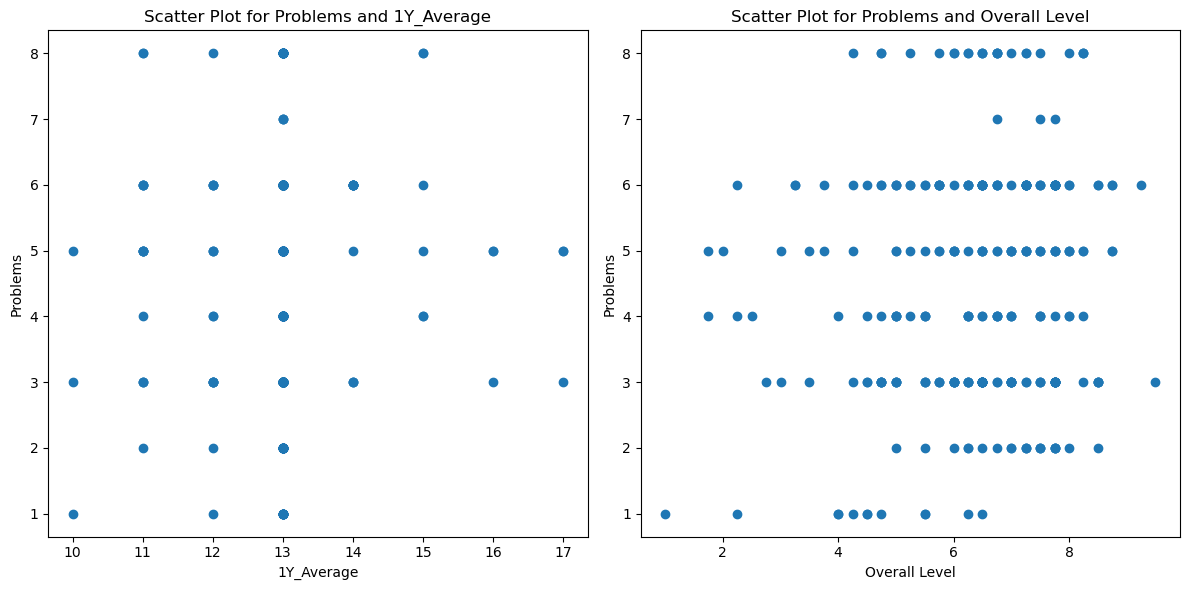

In [22]:
# Scatter plot for 'Problems' and '1Y_Average'
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(data['1Y_Average'],data['Problems'],cmap='viridis')
plt.title('Scatter Plot for Problems and 1Y_Average')
plt.xlabel('1Y_Average')
plt.ylabel('Problems')

# Scatter plot for 'Problems' and 'Overall Level'
plt.subplot(1, 2, 2)
plt.scatter(data['Overall Level'],data['Problems'], cmap='viridis')
plt.title('Scatter Plot for Problems and Overall Level')
plt.xlabel('Overall Level')
plt.ylabel('Problems')


plt.tight_layout()
plt.show()

<div style="text-align:center">
    <font color='purple'><h1>4. Modeling</h1></font>
</div>

<div style="text-align:left">
    <font color='blue'><h3>4.1 selcting a modeling technique
       </h3></font>
</div>

In order to see the effects of the major selected problems on the students' performance we are using unsupervised clustering (k_means clustering) on the problems and the students' overall level , then on the problems and their first year average 


<div style="text-align:left">
    <font color='blue'><h3>4.2 Apply Clustering with K-means Algorithm
       </h3></font>
</div>

#### 4.2.1 Apply K-means for 'Problems' and 'Overall Level' 

As an initial criterion for evaluating students' academic performance, the self-assessment component encompasses the personal ratings provided by the students themselves.

In [23]:
#Extracting the needed columns
data_2 = data[['Problems', 'Overall Level']]

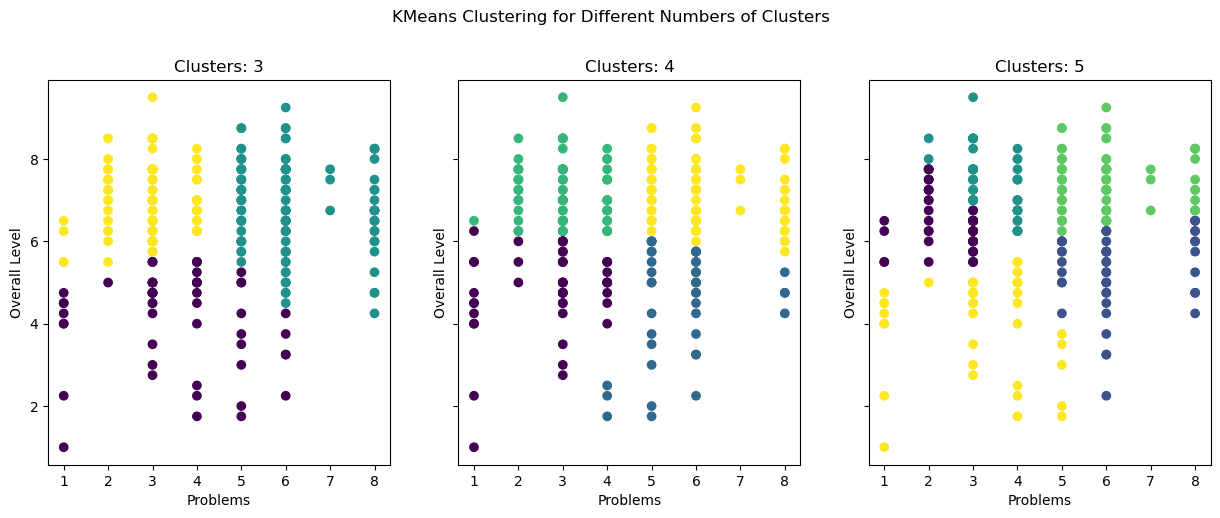

In [24]:
# Define a range of cluster numbers to try
cluster_range = range(3, 6) 

fig, axs = plt.subplots(1, len(cluster_range), figsize=(15, 5), sharey=True)

#Using the KMeans function from sklearn.cluster
kmeans = KMeans(n_clusters=3)

# Iterate over different numbers of clusters
for i, num_clusters in enumerate(cluster_range):
    # Create KMeans instance using the KMeans function from sklearn.cluster
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)

    # Fit the model to the data
    kmeans.fit(data_2)

    # Extract cluster labels
    labels = kmeans.labels_

    # Plot the clustered data for each number of clusters
    axs[i].scatter(data_2['Problems'],data_2['Overall Level'], c=labels, cmap='viridis')
    axs[i].set_title(f'Clusters: {num_clusters}')
    axs[i].set_ylabel('Overall Level')
    axs[i].set_xlabel('Problems')

plt.suptitle('KMeans Clustering for Different Numbers of Clusters', y=1.02)
plt.show()

#### 4.2.2 - Apply K-means for 'Problems' and '1Y_average' 

The second criterion for assessing students' academic performance involves the computation of their 1-year average.

In [25]:
#Extracting the needed columns
data_3 = data[['Problems', '1Y_Average']]

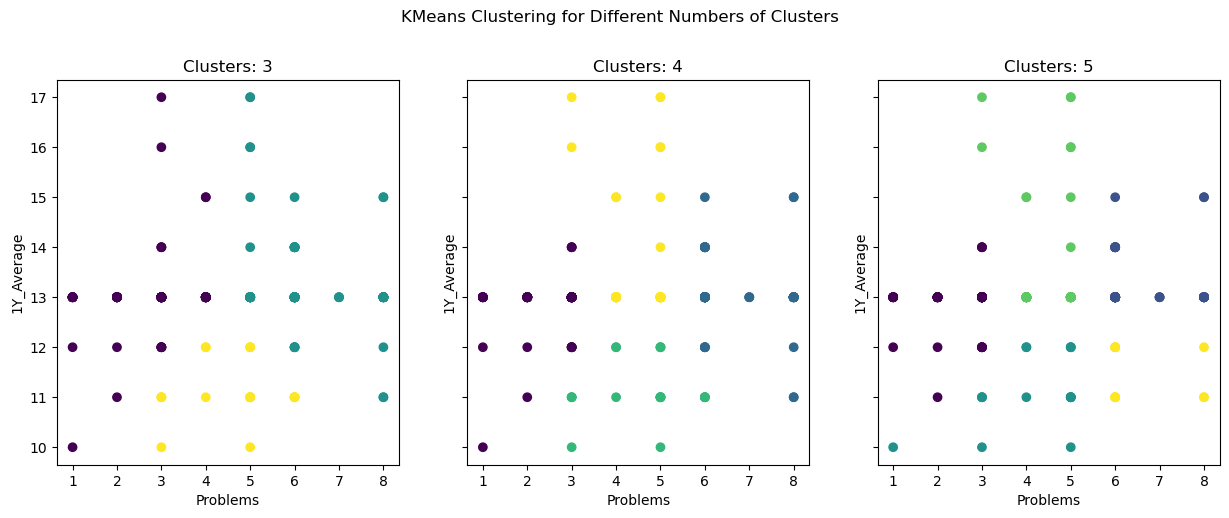

In [26]:
# Define a range of cluster numbers to try
cluster_range = range(3, 6) 

fig, axs = plt.subplots(1, len(cluster_range), figsize=(15, 5), sharey=True)

#Using the KMeans function from sklearn.cluster
kmeans = KMeans(n_clusters=3)

# Iterate over different numbers of clusters
for i, num_clusters in enumerate(cluster_range):
    # Create KMeans instance using the KMeans function from sklearn.cluster
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)

    # Fit the model to the data
    kmeans.fit(data_3)

    # Extract cluster labels
    labels = kmeans.labels_

    # Plot the clustered data for each number of clusters
    axs[i].scatter(data_3['Problems'],data_3['1Y_Average'], c=labels, cmap='viridis')
    axs[i].set_title(f'Clusters: {num_clusters}')
    axs[i].set_ylabel('1Y_Average')
    axs[i].set_xlabel('Problems')

plt.suptitle('KMeans Clustering for Different Numbers of Clusters', y=1.02)
plt.show()

<div style="text-align:center">
    <font color='purple'><h1>5. Evaluation</h1></font>
</div>

” Without a strong effort in this direction, cluster analysis will remain a black art accessible only to those true believers who have experience and great courage.” 
                                         Algorithms for Clustering Data, Jain and Dubes.
                                         
                                         
                                         
Then we need to evaluate the obtained results 



<div style="text-align:left ">
    <font color='blue'><h3>5.1. Calculating evaluation metrics </h3></font>
</div>

#### 5.1.1. Cohesion 

Cohesion is a measure of how closely the members of a cluster are related to each other. One way to calculate cohesion for KMeans clusters is to compute the sum of squared distances between each point in a cluster and the centroid of that cluster.

In [27]:

def calculate_cohesion(data, labels, centroids):
    cohesion_values = []

    for cluster_num in range(len(centroids)):
        cluster_points = data[labels == cluster_num]
        centroid = centroids[cluster_num]

        # Calculate squared Euclidean distance for each point in the cluster
        distances = ((cluster_points - centroid) ** 2).sum(axis=1)

        # Sum of squared distances
        cohesion = distances.sum()

        cohesion_values.append(cohesion)

    return cohesion_values

# Define a range of cluster numbers to try
cluster_range = range(3, 6) 

# Cohesion calculation for the first case ('Problems' and 'Overall Level')
for i, num_clusters in enumerate(cluster_range):
    kmeans_1 = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans_1.fit(data_2)
    labels_1 = kmeans_1.labels_
    centroids_1 = kmeans_1.cluster_centers_

    cohesion_values_1 = calculate_cohesion(data_2, labels_1, centroids_1)
    print(f"Cohesion values for the clustering using 'Problems' and 'Overall Level' with k={num_clusters}:", cohesion_values_1)

# Cohesion calculation for the second case ('Problems' and '1Y_Average')
for i, num_clusters in enumerate(cluster_range):
    kmeans_2 = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans_2.fit(data_3)
    labels_2 = kmeans_2.labels_
    centroids_2 = kmeans_2.cluster_centers_

    cohesion_values_2 = calculate_cohesion(data_3, labels_2, centroids_2)
    print(f"Cohesion values for the clustering using 'Problems' and '1Y_Average' with k={num_clusters}:", cohesion_values_2)


Cohesion values for the clustering using 'Problems' and 'Overall Level' with k=3: [183.1818181818182, 266.1686991869919, 118.2048969072165]
Cohesion values for the clustering using 'Problems' and 'Overall Level' with k=4: [106.78846153846153, 109.17151162790695, 83.16415662650604, 163.95618556701032]
Cohesion values for the clustering using 'Problems' and 'Overall Level' with k=5: [42.200980392156865, 96.04036458333333, 39.829081632653065, 117.61309523809524, 123.73837209302324]
Cohesion values for the clustering using 'Problems' and '1Y_Average' with k=3: [154.4732824427481, 217.28225806451613, 27.099999999999994]
Cohesion values for the clustering using 'Problems' and '1Y_Average' with k=4: [70.51020408163268, 102.1590909090909, 27.099999999999994, 97.88405797101451]
Cohesion values for the clustering using 'Problems' and '1Y_Average' with k=5: [59.56701030927835, 79.58024691358025, 29.52941176470588, 97.88405797101451, 11.454545454545457]


The cohesion values provide insights into the quality of clustering for both 'Problems' and 'Overall Level' as well as 'Problems' and '1Y_Average' across different values of K. For the case of 'Problems' and 'Overall Level,' the cohesion values indicate that, with k=3, there is a moderate spread, suggesting reasonable cohesion within clusters. As k increases to 4, the cohesion values vary, indicating different levels of internal compactness across clusters. With k=5, some clusters exhibit low cohesion, suggesting that this value of K may not be optimal for achieving well-defined clusters. Similarly, for 'Problems' and '1Y_Average,' cohesion values show a moderate spread at k=3, indicating mixed internal cohesion. As k increases to 4, varying internal compactness is observed, with some clusters being more cohesive than others. For k=5, certain clusters show low cohesion, highlighting potential challenges in achieving optimal clustering.

#### 5.2 Silhouette Coefficient 

The Silhouette Coefficient is another metric used to evaluate the performance of clustering algorithms. It measures how well-defined the clusters are. A higher Silhouette Coefficient indicates better-defined clusters. The coefficient ranges from -1 to 1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. A value near 0 indicates overlapping clusters.

In [28]:

# Define a range of cluster numbers to try
cluster_range = range(3, 6)

# Silhouette Coefficient calculation for the first case ('Problems' and 'Overall Level')
print("Silhouette Coefficient for the clustering using 'Problems' and 'Overall Level':")
for num_clusters in cluster_range:
    kmeans_1 = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans_1.fit(data_2)
    labels_1 = kmeans_1.labels_
    silhouette_coefficient_1 = silhouette_score(data_2, labels_1)
    print(f"For k={num_clusters}: {silhouette_coefficient_1}")

# Silhouette Coefficient calculation for the second case ('Problems' and '1Y_Average')
print("\nSilhouette Coefficient for the clustering using 'Problems' and '1Y_Average':")
for num_clusters in cluster_range:
    kmeans_2 = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans_2.fit(data_3)
    labels_2 = kmeans_2.labels_
    silhouette_coefficient_2 = silhouette_score(data_3, labels_2)
    print(f"For k={num_clusters}: {silhouette_coefficient_2}")


Silhouette Coefficient for the clustering using 'Problems' and 'Overall Level':
For k=3: 0.4250972711163213
For k=4: 0.38054786680025726
For k=5: 0.29288414383414696

Silhouette Coefficient for the clustering using 'Problems' and '1Y_Average':
For k=3: 0.5166452557562823
For k=4: 0.5068661724777429
For k=5: 0.49381365944779126


The Silhouette Coefficient values offer insights into the clustering quality for both 'Problems' and 'Overall Level' as well as 'Problems' and '1Y_Average' across varying values of K. For 'Problems' and 'Overall Level,' the Silhouette Coefficient is highest at k=3, indicating well-defined clusters. However, with an increase in K to 4 and 5, there is a slight reduction in the Silhouette Coefficient, suggesting potential overlap between clusters. Meanwhile, for 'Problems' and '1Y_Average,' the Silhouette Coefficient consistently rises with higher values of K, indicating increasingly well-defined and distinct clusters. The peak Silhouette Coefficient is observed at k=5, indicating strong separation and cohesion within clusters. These observations highlight the sensitivity of the Silhouette Coefficient to the choice of K and the distinct clustering characteristics of each feature combination.

#### 5.1.3 Separation

The separation metric assesses how distinct and non-overlapping clusters are in a clustering solution by measuring the dissimilarity between points in different clusters. A higher separation value indicates more pronounced distinctiveness between clusters.

In [29]:

def calculate_separation(data, labels):
    distance_matrix = pairwise_distances(data)
    separation = 0

    for i in range(len(data)):
        for j in range(i + 1, len(data)):
            if labels[i] != labels[j]:
                separation += distance_matrix[i, j]

    return separation

# Separation calculation for the first case ('Problems' and 'Overall Level')
print("Separation for the clustering using 'Problems' and 'Overall Level':")
for num_clusters in cluster_range:
    kmeans_1 = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans_1.fit(data_2)
    labels_1 = kmeans_1.labels_
    separation_1 = calculate_separation(data_2, labels_1)
    print(f"For k={num_clusters}: {separation_1}")

# Separation calculation for the second case ('Problems' and '1Y_Average')
print("\nSeparation for the clustering using 'Problems' and '1Y_Average':")
for num_clusters in cluster_range:
    kmeans_2 = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans_2.fit(data_3)
    labels_2 = kmeans_2.labels_
    separation_2 = calculate_separation(data_3, labels_2)
    print(f"For k={num_clusters}: {separation_2}")


Separation for the clustering using 'Problems' and 'Overall Level':
For k=3: 86882.86865387521
For k=4: 94666.98310477135
For k=5: 98838.09158332819

Separation for the clustering using 'Problems' and '1Y_Average':
For k=3: 69595.876458837
For k=4: 79520.92094609953
For k=5: 80958.97826406518


The separation metric consistently increases with higher values of K, reaching its peak at k=5. This suggests that adding more clusters enhances the distinctiveness between clusters.
Similar to the 'Problems' and 'Overall Level' case, the separation metric shows a continuous increase with higher K values. The highest separation is observed at k=5, indicating improved distinctiveness between clusters.
In both cases, the trend in separation aligns with expectations, demonstrating an improvement in the separation of clusters as the number of clusters increases.

<div style="text-align:left ">
    <font color='blue'><h3>5.2. comparison  </h3></font>
</div>

The comparison of cohesion and silhouette coefficient values provides a holistic view of the clustering performance across different cases and values of K. In general, a good clustering solution should exhibit both high cohesion and a high silhouette coefficient.

Observing the results:

**Clustering using 'Problems' and 'Overall Level':**
- Cohesion values vary with different K values, indicating that the clusters have varying internal compactness.
- Silhouette Coefficient is relatively high at k=3, suggesting well-defined clusters.
- Separation metric consistently increases with higher K values, reaching its peak at k=5, emphasizing enhanced distinctiveness between clusters.

**Clustering using 'Problems' and '1Y_Average':**
- Cohesion values show some variability across K values, with mixed internal cohesion within clusters.
- Silhouette Coefficient consistently increases with higher K values, indicating well-defined and distinct clusters.
- Separation metric also rises with higher K values, reaching its highest at k=5, reinforcing improved distinctiveness between clusters.

**Comparison:**
- For 'Problems' and 'Overall Level,' k=5 exhibits the highest separation, cohesion, and a high silhouette coefficient, suggesting enhanced distinctiveness and internal cohesion.
- For 'Problems' and '1Y_Average,' k=5 stands out with the highest separation, cohesion, and silhouette coefficient, emphasizing well-defined and internally cohesive clusters.

Taking into account cohesion, silhouette coefficient, and separation metrics, the clustering case using 'Problems' and '1Y_Average' with k=5 appears to be the most promising, showing consistent strengths across multiple evaluation aspects.  

<div style="text-align:center">
    <font color='purple'><h1>6. Conclusion </h1></font>
</div>

In our exploration to understand the primary factors influencing ENSIA students' performance, the clustering analysis has provided valuable insights, particularly when considering the 'Problems' and '1Y_Average' configuration with k=5. 

<div style="text-align:left ">
    <font color='blue'><h3>6.1 Key findings  </h3></font>
</div>

**6.1.1 Optimal Clustering Configuration**: The 'Problems' and '1Y_Average' configuration with k=5 consistently demonstrated superior performance. This clustering setup exhibited high internal cohesion, well-defined clusters, and enhanced distinctiveness between clusters.

**6.1.2 Problem Identification**: By mapping clusters back to the problems using the provided dictionary, we associated specific problems with each cluster. This granular understanding facilitates targeted interventions.

<div style="text-align:left ">
    <font color='blue'><h3>6.2 Impact on Problem Classification </h3></font>
</div>

**6.2.1 High-Impact Problems Identification**: Leveraging clustering results, we identified problems with a more significant impact on student performance. This insight allows for prioritized interventions, focusing resources on the most impactful issues.

In [30]:
k_best = 5
kmeans_best = KMeans(n_clusters=k_best, random_state=42)
kmeans_best.fit(data_3)

# Extract cluster labels
labels_best = kmeans_best.labels_

# Identify the cluster with the lowest 1-year average
lowest_average_cluster = min(range(k_best), key=lambda cluster: np.mean(data_3['1Y_Average'][labels_best == cluster]))

# Get the unique problems for the cluster with the lowest 1-year average
problems_lowest_average = set(
    [next(key for key, value in problems_mapping.items() if value == data_3['Problems'].iloc[i])
     for i, label in enumerate(labels_best) if label == lowest_average_cluster]
)

# Display the list of unique problems
print("Main problems affecting students with the lowest 1-year average:", list(problems_lowest_average))


Main problems affecting students with the lowest 1-year average: ['Lack of time', 'Teaching language', 'Lack of previous knowledge or experience in the field', "Teachers' teaching method"]


After getting those results we can focus on finding solutions to those 4 main problems first by adjusting timetables, helping students to handle pressure, changing teaching methods,...etc

**6.2.1 Grouping of Problems**: Clustering outcomes enabled the grouping of problems based on their impact. This structured approach efficiently addresses specific problem sets, providing a tailored response to each cluster's unique challenges.

In [31]:
k_best = 5
kmeans_final = KMeans(n_clusters=k_best, random_state=42)
kmeans_final.fit(data_3)

# Extract cluster labels
labels_final = kmeans_final.labels_

# Map clusters to unique problems
clustered_problems = {i: set() for i in range(k_best)}
for i, label in enumerate(labels_final):
    problem = next(key for key, value in problems_mapping.items() if value == data_3['Problems'].iloc[i])
    clustered_problems[label].add(problem)

# Display the resulting groups of unique problems for each cluster
for cluster, problems in clustered_problems.items():
    print(f"Cluster {cluster + 1}: {list(problems)}")


Cluster 1: ['Lack of time', 'Teaching language', 'Bad quality of internet']
Cluster 2: ['Not having a good (powerful) computer', 'Pressure', 'Private life problems']
Cluster 3: ['Lack of time', 'Teaching language', 'Lack of previous knowledge or experience in the field', "Teachers' teaching method"]
Cluster 4: ['Lack of previous knowledge or experience in the field', "Teachers' teaching method", 'Lack of time']
Cluster 5: ['Pressure', 'Private life problems']


From the obtained results we can divide our list of problem into groups of problems with the same influence level and classify them from the ones having lowest to highest impacts as follows: 
- **1**: [ 'Bad quality of internet', 'Teaching language']
- **2**: [ 'Private life problems', 'Not having a good (powerful) computer']
- **3**: [ 'Lack of time', 'Lack of previous knowledge or experience in the field', 'Pressure', "Teachers' teaching method"]


<div style="text-align:left ">
    <font color='blue'><h3>6.3 Project impact  </h3></font>
</div>

**6.3.1 Granular Problem Identification**: The clustering results allow a detailed exploration of specific problems influencing students' academic performance, enabling precise targeting of interventions and strategies.

**6.3.2 Optimized Resource Allocation**: Armed with insights into which problems have a more significant impact, educational resources and support services can be strategically allocated to address the specific needs of each problem cluster. This targeted approach enhances the effectiveness of interventions.

**6.3.3 Continuous Improvement**: The iterative nature of clustering analysis allows for continuous refinement and improvement of the model. Regular updates to the clustering approach based on new data and insights will ensure the project's relevance and ongoing impact.

**6.3.4 Informed Decision-Making**: The project's findings provide educators, administrators, and policymakers with valuable insights to make informed decisions regarding student support, curriculum enhancements, and overall educational policies.



<div style="text-align:center">
    <font color='purple'><h3>In conclusion, the 'Problems' and '1Y_Average' clustering configuration with k=5 emerges as the most promising, offering a comprehensive understanding of problem clusters and their impact on student performance. This approach equips ENSIA with actionable insights to tailor interventions, allocate resources efficiently, and continuously improve educational strategies for optimal student outcomes. </h3></font>
</div>